# Project 2 - Price Prediction for Houses in Ames, Iowa

----------

## Introduction

For project 2 we are going to analyze the housing dataset of different houses in Ames, Iowa between 2006-2010.

[Data dictionary - Ames Iowa Housing dataset](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

### Objective:

We need to clean and perform feature engineer in order to develop a model that can predict the sale price of houses, specifically in Ames, Iowa.

### Audience:

Homeowners

### Problem Statement:

Homeowners struggle to identify what aspects or features of their home are vital to determining the value of their homes.

## 1. Import Libraries

In [1]:
# Import libraries

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix

from statsmodels.sandbox.regression.predstd import wls_prediction_std

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 2. Load Datasets

In [2]:
# Load train and test dataset

test = pd.read_csv('datasets/test.csv')
train = pd.read_csv('datasets/train.csv')

# Combine train and test dataset

train_test = pd.concat([train, test], axis=0)

## 3. Data Analysis

#### 3.1 Train and Test Data Exploration

For both train and test dataset we will explore the following:
* First 5 rows
* Data Types
* Data Shape
* Data Information
* Null Values
* Null Value Visualization

#### 3.1.1 First 5 Rows - Train Data

In [3]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

#### 3.1.2 Data Types - Train Data

In [4]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

#### 3.1.3 Data Shape - Train Data

In [5]:
train.shape

(2051, 81)

#### 3.1.4 Data Information - Train Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### 3.1.5 Null Values - Train Data

In [7]:
train.isnull().sum().sort_values(ascending=False).head(27)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Mo Sold              0
dtype: int64

#### 3.1.6 Null Values Visualization - Train Data

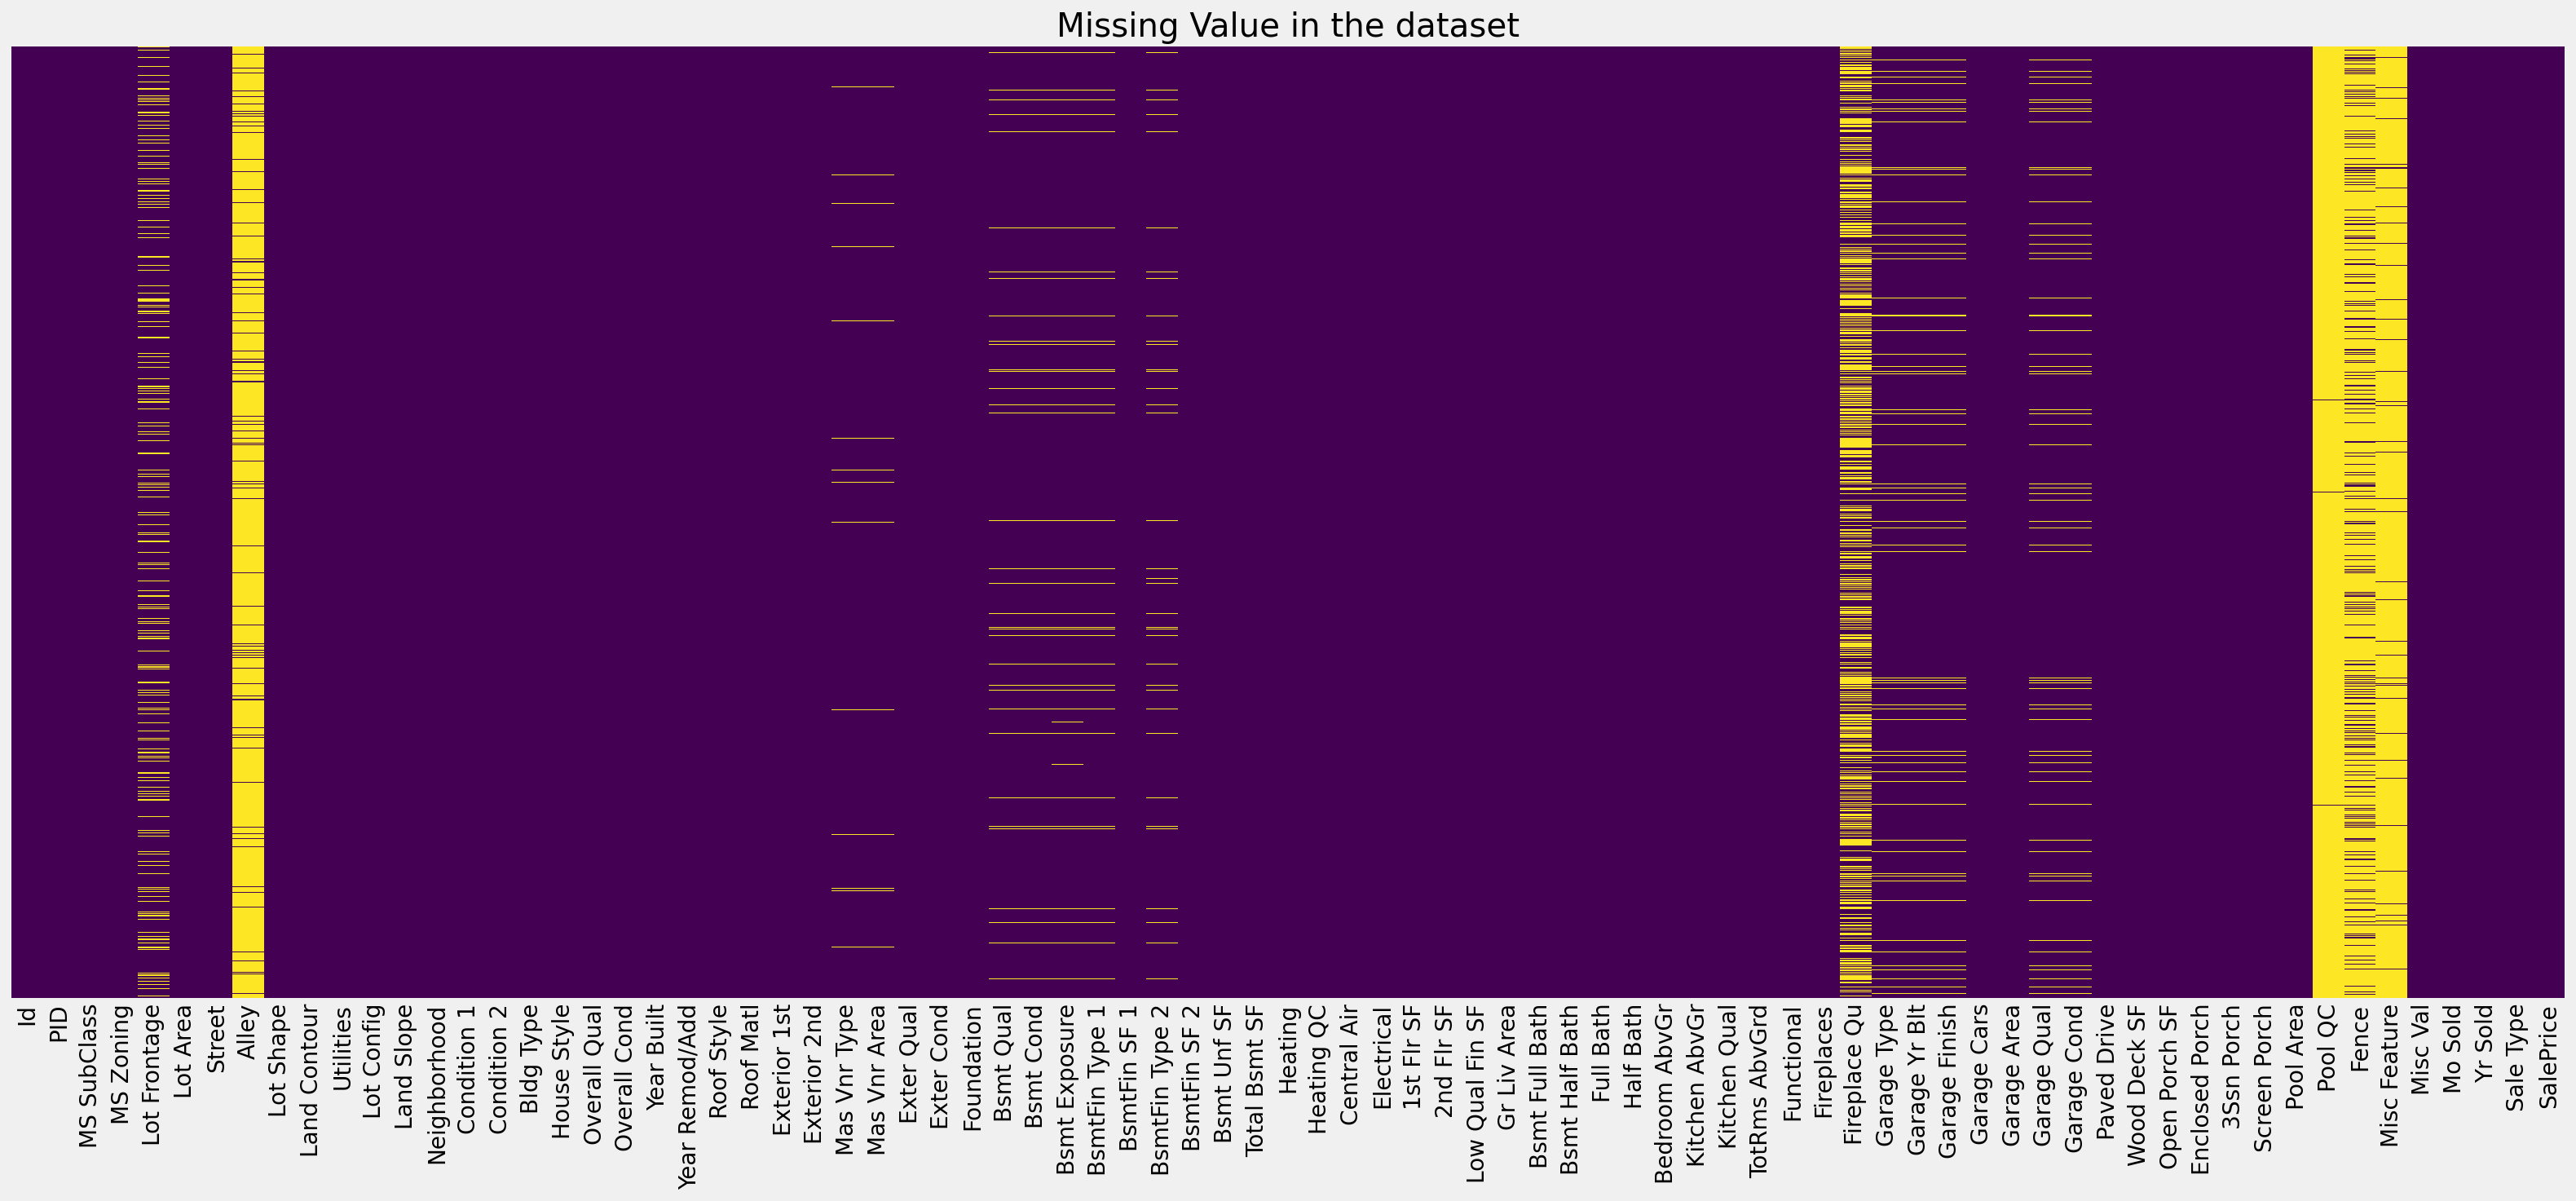

In [8]:
plt.figure(figsize=(25,10))
sns.heatmap(train.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing Value in the dataset');

#### 3.2.1 First 5 Rows - Test Data

In [9]:
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

#### 3.2.2 Data Type - Test Data

In [10]:
test.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Feature     object
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 80, dtype: object

#### 3.2.3 Data Shape - Test Data

In [11]:
test.shape

(878, 80)

#### 3.2.4 Data Info - Test Data

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

#### 3.2.5 Null Values - Test Data

In [13]:
test.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 1     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 2     25
Electrical          1
Mas Vnr Type        1
Mas Vnr Area        1
Kitchen AbvGr       0
dtype: int64

Taking note that *Sale Price* is not available in the test data set

#### 3.2.6 Null Values Visualization - Test Data

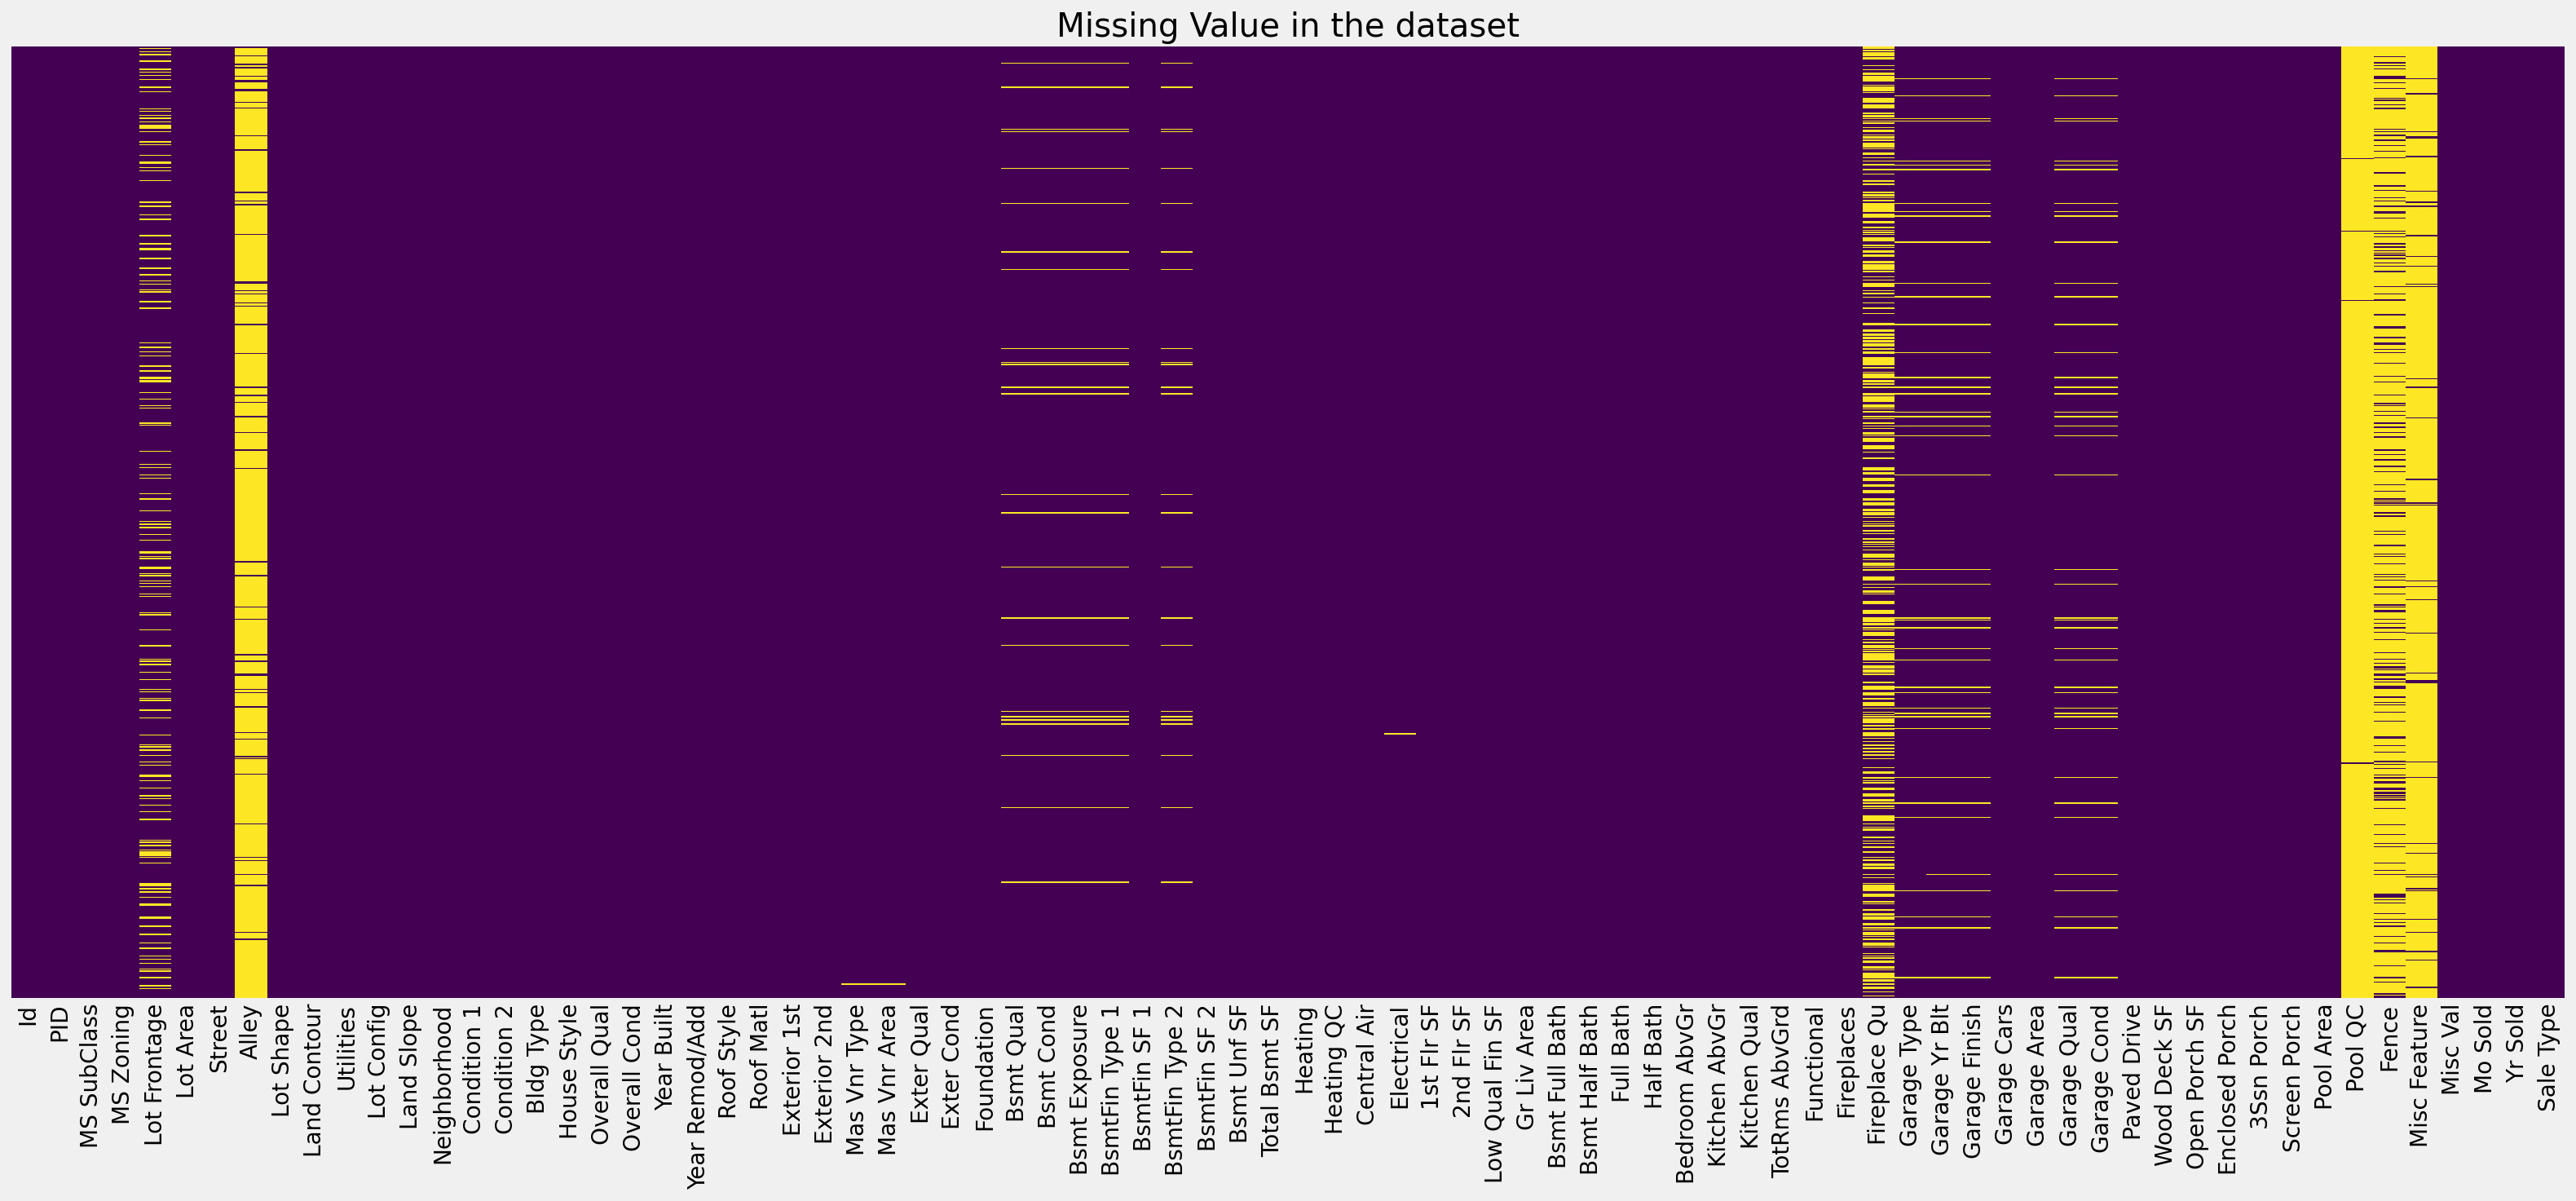

In [14]:
plt.figure(figsize=(25,10))
sns.heatmap(test.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing Value in the dataset');

#### 3.3 Train and Test Data Comparison

We'll compare the differences between the two datasets
* Data Type
* Null Values
* Data Visualization

#### 3.3.1 Data Type Comparison

Since *SalePrice* is not available in the test dataset but available in the train dataset, we'll drop the *SalePrice* from the train dataset.

In [15]:
test_dt = test.dtypes
train_dt = train.dtypes
train_dt = train_dt.drop('SalePrice')
train_dt.compare(test_dt)

self  other
BsmtFin SF 1    float64  int64
BsmtFin SF 2    float64  int64
Bsmt Unf SF     float64  int64
Total Bsmt SF   float64  int64
Bsmt Full Bath  float64  int64
Bsmt Half Bath  float64  int64
Garage Cars     float64  int64
Garage Area     float64  int64

#### 3.3.2 Null Value Comparison

In [16]:
train_n = train.isnull().sum()
test_n = test.isnull().sum()
train_n = train_n.drop('SalePrice')
train_test_n = train_n.compare(test_n).sort_values(['self'], ascending=[False])
train_test_n

self  other
Pool QC         2042.0  874.0
Misc Feature    1986.0  837.0
Alley           1911.0  820.0
Fence           1651.0  706.0
Fireplace Qu    1000.0  422.0
Lot Frontage     330.0  160.0
Garage Cond      114.0   45.0
Garage Qual      114.0   45.0
Garage Finish    114.0   45.0
Garage Yr Blt    114.0   45.0
Garage Type      113.0   44.0
Bsmt Exposure     58.0   25.0
BsmtFin Type 2    56.0   25.0
BsmtFin Type 1    55.0   25.0
Bsmt Qual         55.0   25.0
Bsmt Cond         55.0   25.0
Mas Vnr Area      22.0    1.0
Mas Vnr Type      22.0    1.0
Bsmt Half Bath     2.0    0.0
Bsmt Full Bath     2.0    0.0
Total Bsmt SF      1.0    0.0
Bsmt Unf SF        1.0    0.0
Garage Cars        1.0    0.0
Garage Area        1.0    0.0
BsmtFin SF 2       1.0    0.0
BsmtFin SF 1       1.0    0.0
Electrical         0.0    1.0

#### 3.3.3.1 Data Visualization - Linearity Check

In [74]:
numerical_features

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

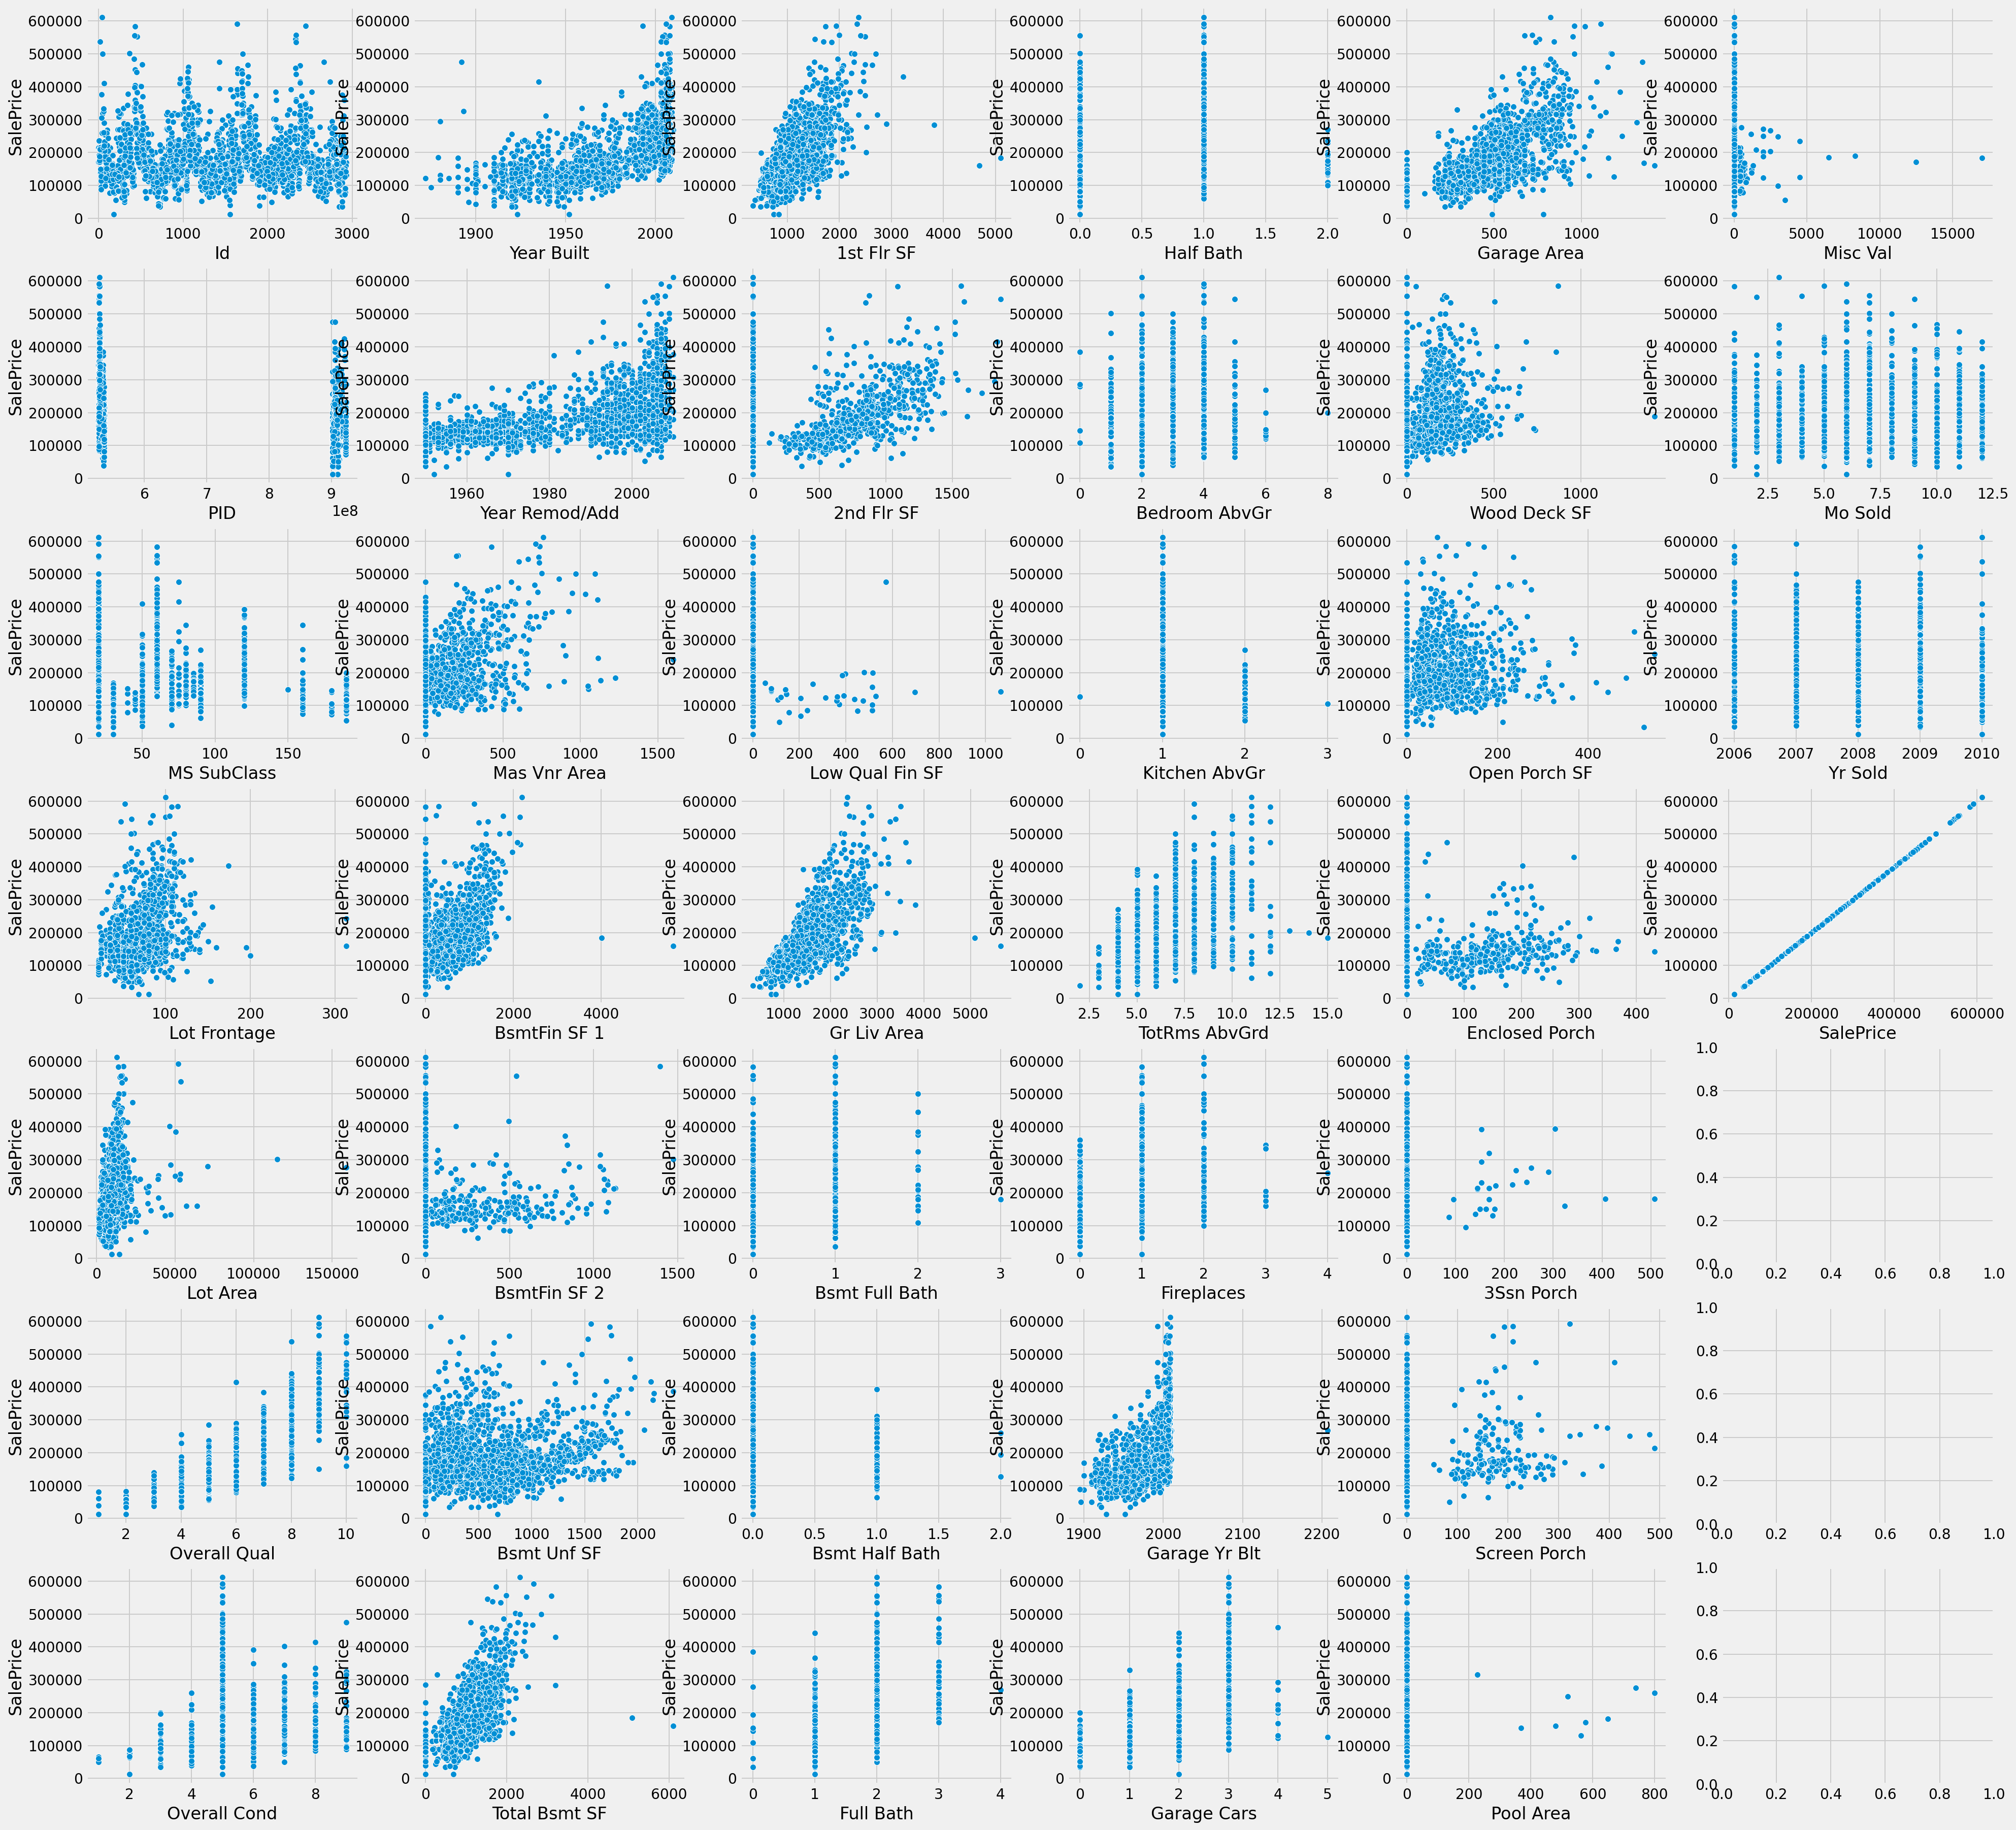

In [17]:
numerical_features = [col for col in train.columns if train[col].dtypes != 'O']

f, axes = plt.subplots(7,6 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=train_test, x = feature, y= "SalePrice",ax=axes[i%7, i//7])

The above data visualization shows that:

* Generally the newer the house, the more expensive it costs, however we notice that there are old houses that are holding their value strongly, which we assume is because of the large size.
* "Year Built" and "Year Remod/Add" looks similar in terms of the distribution
* Some homes with no second floor can be seen to have high sale prices, which could be due to a large lot area.
* We notice that some features are not linear towards SalesPrice (target feature):
    * "SalePrice" VS."BsmtUnfSF"
    * "SalePrice" VS."LotArea"
    * "SalePrice" VS."LotFrontage"
    * "SalePrice" VS."EnclosedPorch"
    * "SalePrice" VS."3SsnPorch"
    * "SalePrice" VS."OpenPorchSF"
    * "SalePrice" VS."WoodDeckSF"

#### 3.3.3.2 Data Visualization - Feature Similarity Check

C:\Users\Sing\AppData\Local\Temp/ipykernel_17100/2852276902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test["Label"][:1464] = "train"


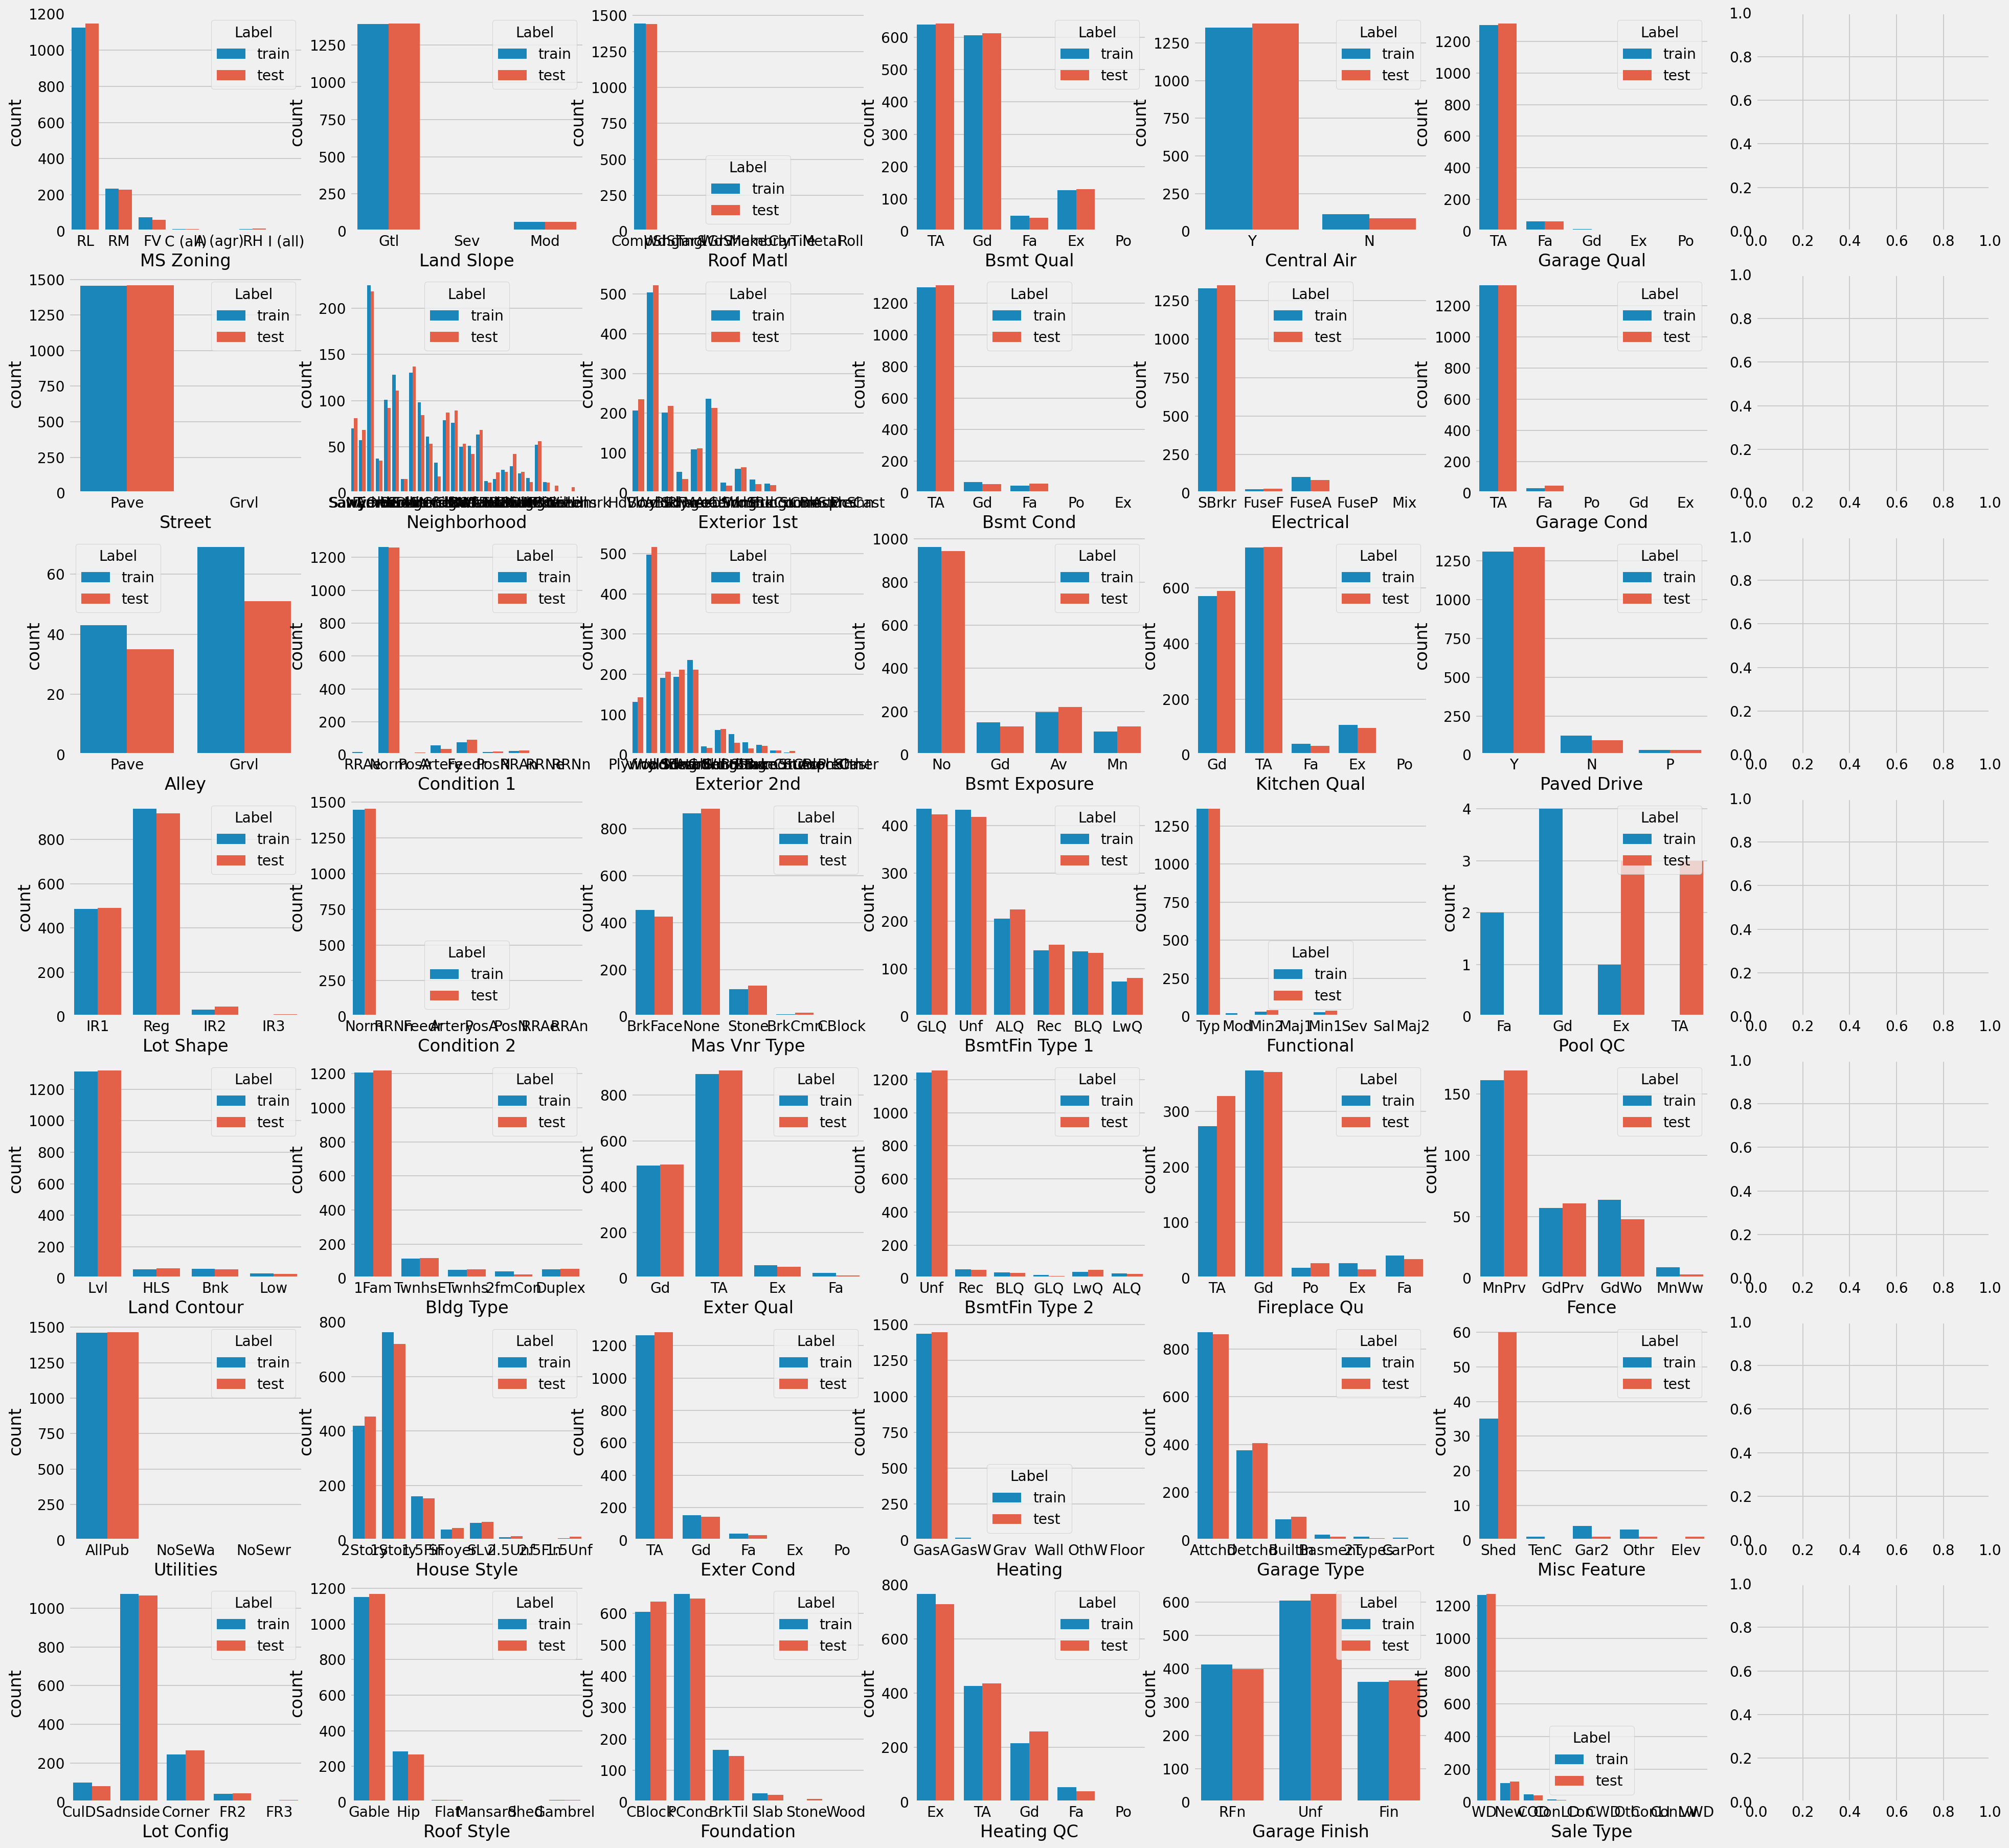

In [18]:
categorical_features = [col for col in train.columns if train[col].dtype == 'O']
train_test["Label"] = "test"
train_test["Label"][:1464] = "train"

f, axes = plt.subplots(7,7 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(categorical_features):
    sns.countplot(data = train_test, x = feature, hue="Label",ax=axes[i%7, i//7])

In [75]:
categorical_features

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

The above data visualization shows that:

* The distribution of train and test data are similar for most categorical features.
* Some features are more dominant than others and will be considered for removal.
    * Ex: "Roof Material", "Heating", "Utilities", "Condition 2", "Street", "Functional"
* The distribution of the features for "Garage Qual" and "Garage Cond" is similar so we can consider combining.
* The distribution of the features for "Fireplace Qu" are not linear to SalePrice so we can consider removing.

#### 3.3.3.3 Data Visualization - Correlianity Check

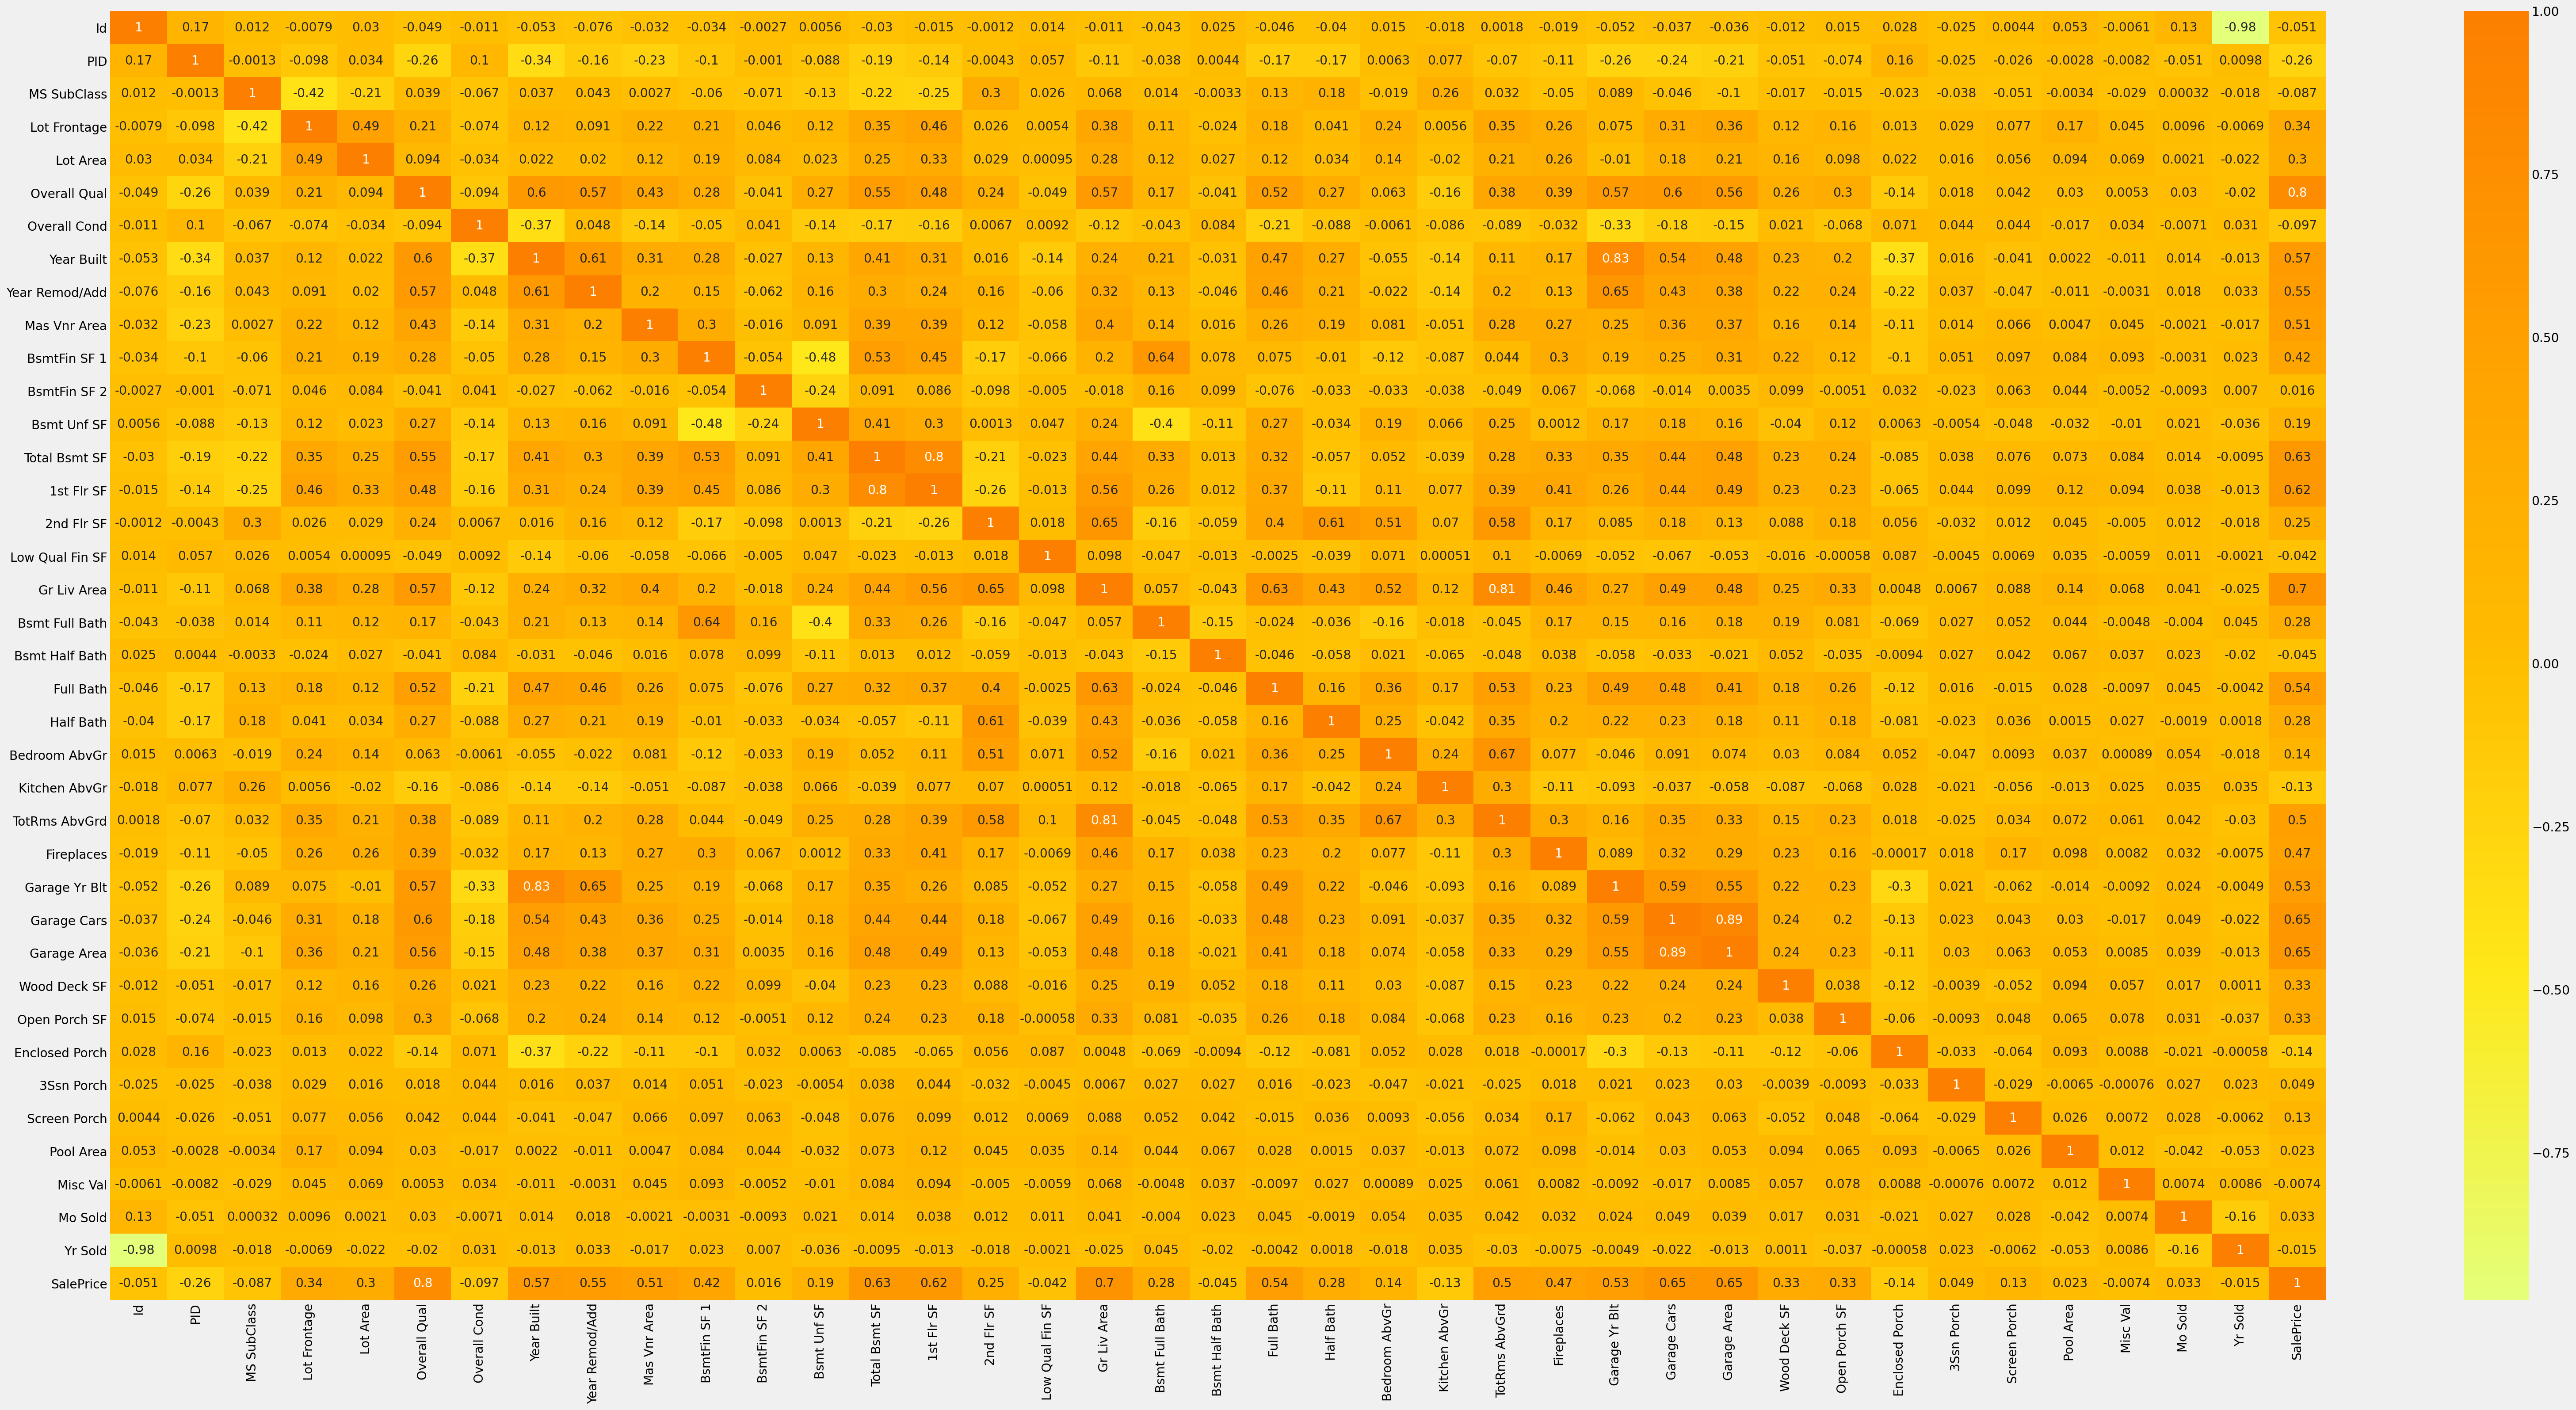

In [19]:
plt.figure(figsize=(50,25))
corr = train_test.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

The heatmap help us identify the the top 10 features that are positively correlated to sale price:

* Overall Quality
* Ground Living Area
* Garage Cars
* Garage Area
* 1st Floor SF
* Full Bath
* Year Built
* Year Renovated
* Mas Vnr Area
* Total Basement SF

## 4. Feature Engineering

We will proceed with the following actions:
* Replace Values
* Get Dummy Variables
* Drop Columns

#### 4.1 Feature Clean Up - Replace Values

In [20]:
train_test['Lot Frontage'] = train_test['Lot Frontage'].fillna(0)
train_test['Mas Vnr Area'] = train_test['Mas Vnr Area'].fillna(0)
train_test['Garage Area'] = train_test['Garage Area'].fillna(0)
train_test['Garage Yr Blt'] = train_test['Garage Yr Blt'].fillna(0)
train_test['Total Bsmt SF'] = train_test['Total Bsmt SF'].fillna(0)
train_test['BsmtFin SF 1'] = train_test['BsmtFin SF 1'].fillna(0)
train_test['BsmtFin SF 2'] = train_test['BsmtFin SF 2'].fillna(0)
train_test['Bsmt Half Bath'] = train_test['Bsmt Half Bath'].fillna(0)
train_test['Bsmt Full Bath'] = train_test['Bsmt Full Bath'].fillna(0)
train_test['Garage Cars'] = train_test['Garage Cars'].fillna(0)
train_test['Alley'] = train_test['Alley'].fillna(0)
train_test['Pool QC'] = train_test['Pool QC'].fillna(0)
train_test['SalePrice'] = train_test['SalePrice'].fillna(0)

#### 4.2 Feature Clean Up - Get Dummies

I decided to creat dummies for all features that have variables consisting of strings.

In [21]:
train_test = pd.get_dummies(train_test, columns=['Misc Feature'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Fence'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Garage Cond'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Garage Qual'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Garage Finish'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Garage Type'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Bsmt Exposure'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['BsmtFin Type 2'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['BsmtFin Type 1'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Bsmt Qual'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Bsmt Cond'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Bldg Type'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Land Contour'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['House Style'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Mas Vnr Type'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Exter Qual'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Exter Cond'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Roof Style'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Central Air'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['MS Zoning'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Land Slope'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Electrical'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Paved Drive'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Lot Config'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Lot Shape'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Neighborhood'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Condition 1'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Exterior 1st'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Exterior 2nd'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Foundation'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Kitchen Qual'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Heating QC'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Sale Type'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Alley'], drop_first=True)
train_test = pd.get_dummies(train_test, columns=['Pool QC'], drop_first=True)

#### 4.3 Feature Clean Up - Drop Columns

I decided to drop the following columns because they are not possitively correlated to the target ("SalePrice")

In [22]:
train_test.drop(["Roof Matl",
                 "Heating",
                 "Utilities",
                 "Condition 2",
                 "Street",
                 "Functional",
                 "Id",
                 "Open Porch SF",
                 "3Ssn Porch",
                 "Enclosed Porch",
                 "Lot Area",
                 "Bsmt Unf SF",
                 "Fireplace Qu",
                 "PID",
                 "Label"
                ], axis = 1, inplace=True)

In [23]:
train_test.shape

(2929, 221)

## 5. Model Development

The models that we will be testing on are the following:
* KNN Regression
* Linear Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression
* Mean Squared Error for Result Validation
* OLS Regression

#### Assemble our predictor variables (X) and our target (y) 

In [78]:
train.shape

(2051, 81)

In [24]:
new_train_data = train_test.iloc[:len(train), :]

In [77]:
new_train_data.shape

(2051, 221)

In [26]:
X = new_train_data.drop(['SalePrice'], axis = 'columns')
y = new_train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.5,
                                                    random_state = 42)

In [27]:
new_train_data.info(object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 221 columns):
 #    Column                Dtype  
---   ------                -----  
 0    MS SubClass           int64  
 1    Lot Frontage          float64
 2    Overall Qual          int64  
 3    Overall Cond          int64  
 4    Year Built            int64  
 5    Year Remod/Add        int64  
 6    Mas Vnr Area          float64
 7    BsmtFin SF 1          float64
 8    BsmtFin SF 2          float64
 9    Total Bsmt SF         float64
 10   1st Flr SF            int64  
 11   2nd Flr SF            int64  
 12   Low Qual Fin SF       int64  
 13   Gr Liv Area           int64  
 14   Bsmt Full Bath        float64
 15   Bsmt Half Bath        float64
 16   Full Bath             int64  
 17   Half Bath             int64  
 18   Bedroom AbvGr         int64  
 19   Kitchen AbvGr         int64  
 20   TotRms AbvGrd         int64  
 21   Fireplaces            int64  
 22   Garage Yr Blt         

#### 5.1 KNN Regression Testing

In [28]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [29]:
k_3 = KNeighborsClassifier(n_neighbors = 3)
k_3.fit(X_train_sc, y_train)

k_5 = KNeighborsClassifier(n_neighbors = 5)
k_5.fit(X_train_sc, y_train)

k_15 = KNeighborsClassifier(n_neighbors = 15)
k_15.fit(X_train_sc, y_train)

k_25 = KNeighborsClassifier(n_neighbors = 25)
k_25.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=25)

In [30]:
print("k-nearest neighbors training accuracy with k = 3: " + str(k_3.score(X_train_sc, y_train)))
print("k-nearest neighbors testing accuracy with k = 3: " + str(k_3.score(X_test_sc, y_test)))

print("k-nearest neighbors training accuracy with k = 5: " + str(k_5.score(X_train_sc, y_train)))
print("k-nearest neighbors testing accuracy with k = 5: " + str(k_5.score(X_test_sc, y_test)))

print("k-nearest neighbors training accuracy with k = 15: " + str(k_15.score(X_train_sc, y_train)))
print("k-nearest neighbors testing accuracy with k = 15: " + str(k_15.score(X_test_sc, y_test)))

print("k-nearest neighbors training accuracy with k = 25: " + str(k_25.score(X_train_sc, y_train)))
print("k-nearest neighbors testing accuracy with k = 25: " + str(k_25.score(X_test_sc, y_test)))

k-nearest neighbors training accuracy with k = 3: 0.31121951219512195
k-nearest neighbors testing accuracy with k = 3: 0.008771929824561403
k-nearest neighbors training accuracy with k = 5: 0.19317073170731708
k-nearest neighbors testing accuracy with k = 5: 0.007797270955165692
k-nearest neighbors training accuracy with k = 15: 0.09073170731707317
k-nearest neighbors testing accuracy with k = 15: 0.008771929824561403
k-nearest neighbors training accuracy with k = 25: 0.07804878048780488
k-nearest neighbors testing accuracy with k = 25: 0.007797270955165692


In [106]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=15)
model.fit(X_train_sc, y_train)

KNeighborsRegressor(n_neighbors=15)

In [107]:
model.score(X_train_sc, y_train)

0.7766127496590036

In [108]:
model.score(X_test_sc, y_test)

0.7610614311252382

#### 5.2 Linear Regression Testing

In [31]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print (linreg_scores)
print (np.mean(linreg_scores))

[-6.88938708e+08 -2.00823780e+09 -1.23431997e+09 -2.13540584e+09
 -4.92053246e+08 -1.51357053e+09 -4.14538152e+23 -5.97307718e+08
 -3.67779438e+09 -5.18402617e+20]
-4.150565542978556e+22


In [32]:
linreg.fit(X_train, y_train)

LinearRegression()

In [33]:
print(f'R-squared for linear regression on training dataset: {linreg.score(X_train,y_train)}')
print(f'R-squared for linear regression on test dataset: {linreg.score(X_test,y_test)}')

R-squared for linear regression on training dataset: 0.929325194094617
R-squared for linear regression on test dataset: -2445348.3157246797


#### 5.3 Ridge Regression Testing

In [34]:
r_alphas = np.logspace(0,5,100)

ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=10)

ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=10, scoring='r2')

In [35]:
print(f'R-squared for lasso regularization on training dataset: {ridge_cv.score(X_train,y_train)}')
print(f'R-squared for ridge regularization on test dataset: {ridge_cv.score(X_test,y_test)}')

R-squared for lasso regularization on training dataset: 0.9151344149386834
R-squared for ridge regularization on test dataset: 0.8918635325512667


#### 5.4 Lasso Regression Testing

In [36]:
lasso_cv = LassoCV(alphas = np.logspace(-3,3,100), cv = 5, max_iter=50000) #trying 100 alphas from 0.001 to 1000
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=5, max_iter=50000)

In [37]:
print(f'R-squared for lasso regularization on training dataset: {lasso_cv.score(X_train, y_train)}')
print(f'R-squared for lasso regularization on test dataset: {lasso_cv.score(X_test, y_test)}')

R-squared for lasso regularization on training dataset: 0.9149823053043249
R-squared for lasso regularization on test dataset: 0.892271640042577


#### 5.5 Elastic Net Regression Testing

In [38]:
e_alphas = np.logspace(0,5,100)

e_cv = ElasticNetCV(alphas=e_alphas, cv=10, max_iter=5000)

e_cv.fit(X_train, y_train)

c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21635915694.563965, tolerance: 608819755.0412396
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68373487742.36597, tolerance: 608819755.0412396
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117035782835.36255, tolerance: 608819755.0412396
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You 

c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395958773365.77094, tolerance: 594473857.1696204
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411330217737.1284, tolerance: 594473857.1696204
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424093903014.94653, tolerance: 594473857.1696204
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You 

c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2040596764.1716309, tolerance: 602598783.6442114
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19286827286.944336, tolerance: 602598783.6442114
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42780690667.68713, tolerance: 602598783.6442114
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You 

c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311837826556.3372, tolerance: 591905682.830165
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342264847690.75757, tolerance: 591905682.830165
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369141368994.944, tolerance: 591905682.830165
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might

c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400469452179.0463, tolerance: 580539011.384697
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406740167104.87964, tolerance: 580539011.384697
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411174518521.449, tolerance: 580539011.384697
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might

c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273894546260.3227, tolerance: 599471915.3003668
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304581764120.0973, tolerance: 599471915.3003668
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331640076757.82587, tolerance: 599471915.3003668
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You m

c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472913674095.34827, tolerance: 618476928.3436699
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473626269431.75183, tolerance: 618476928.3436699
  model = cd_fast.enet_coordinate_descent_gram(
c:\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 606173281192.586, tolerance: 657446587.008625
  model = cd_fast.enet_coordinate_descent(


ElasticNetCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.149757...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
             cv=10, max_iter=5000)

In [39]:
print(f'R-squared for elastic regularization on training dataset: {e_cv.score(X_train, y_train)}')
print(f'R-squared for elastic regularization on test dataset: {e_cv.score(X_test, y_test)}')

R-squared for elastic regularization on training dataset: 0.8326620722672557
R-squared for elastic regularization on test dataset: 0.8629753306387328


In [40]:
print(e_cv.alpha_)
print(e_cv.l1_ratio)

1.0
0.5


#### 5.6 Mean Squared Error

In [41]:
# Evaluate MSE for LinearReg

y_train_lr = linreg.predict(X_train)
MSE_train = mean_squared_error(y_train, y_train_lr)
y_test_lr = linreg.predict(X_test)
MSE_test = mean_squared_error(y_test, y_test_lr)
MSE_diff_lr = abs(1-(MSE_train/MSE_test))

In [42]:
# Evaluate MSE for Lasso

y_train_lasso = lasso_cv.predict(X_train)
MSE_train = mean_squared_error(y_train, y_train_lasso)
y_test_lasso = lasso_cv.predict(X_test)
MSE_test = mean_squared_error(y_test, y_test_lasso)
MSE_diff_lasso = abs(1-(MSE_train/MSE_test))

In [43]:
# Evaluate MSE for Ridge
y_train_ridge = ridge_cv.predict(X_train)
MSE_train = mean_squared_error(y_train, y_train_ridge)
y_test_ridge = ridge_cv.predict(X_test)
MSE_test = mean_squared_error(y_test, y_test_ridge)
MSE_diff_ridge = abs(1-(MSE_train/MSE_test))

In [44]:
# Evaluate MSE for ElasticNet

y_train_e = e_cv.predict(X_train)
MSE_train = mean_squared_error(y_train, y_train_e)
y_test_e = e_cv.predict(X_test)
MSE_test = mean_squared_error(y_test, y_test_e)
MSE_diff_elastic = abs(1-(MSE_train/MSE_test))

In [45]:
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)
y_pred_e = e_cv.predict(X_test)
print(f'Ridge Regression MSE: {mean_squared_error(y_test, y_pred_ridge, squared=False)}')
print(f'Lasso Regression MSE: {mean_squared_error(y_test, y_pred_lasso, squared=False)}')
print(f'ElasticNet Regression MSE: {mean_squared_error(y_test, y_pred_e, squared=False)}')
print('\n')
print('Check for Overfitting')
print(f'LinearReg is overfitted: {MSE_diff_lr*100, "%"}')
print(f'Ridge is overfitted: {MSE_diff_ridge*100, "%"}')
print(f'Lasso is overfitted: {MSE_diff_lasso*100, "%"}')
print(f'ElasticNet is overfitted: {MSE_diff_elastic*100, "%"}') # if this is between 1-2%, then no overfitting.

Ridge Regression MSE: 25770.85534337784
Lasso Regression MSE: 25722.179715235394
ElasticNet Regression MSE: 29009.62571290508


Check for Overfitting
LinearReg is overfitted: (99.99999698161358, '%')
Ridge is overfitted: (18.038376371801956, '%')
Lasso is overfitted: (17.58041983162827, '%')
ElasticNet is overfitted: (27.54009768390022, '%')


#### 5.8 OLS Regression Summary

In [46]:
ols = sm.OLS(y_train, X_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              338.0
Date:                Fri, 27 Aug 2021   Prob (F-statistic):                        0.00
Time:                        10:13:13   Log-Likelihood:                         -11669.
No. Observations:                1025   AIC:                                  2.375e+04
Df Residuals:                     819   BIC:                                  2.477e+04
Df Model:                         206                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
MS SubClass           -101.2659     99.964     -1.013      0.311    -297.483      94.951
Lot Frontage           -24.3373     30.864     -0.789      0.431     -84.920      36.245
Overall Qual          7250.6873   1294.597      5.601      0.000    4709.569    9791.806
Overall Cond          5575.1043   1078.523      5.169      0.000    3458.109    7692.099
Year Built             193.5689     91.345      2.119      0.034      14.271     372.867
Year Remod/Add          63.6996     71.214      0.894      0.371     -76.085     203.484
Mas Vnr Area            26.9957      7.252      3.723      0.000      12.762      41.230
BsmtFin SF 1             1.5407      3.668      0.420      0.675      -5.659       8.740
BsmtFin SF 2             3.8748      9.792      0.396      0.692     -15.346      23.096
Total Bsmt SF            6.2219      5.371      1.158      0.247      -4.322      16.765
1st Flr SF              23.0248      6.238      3.691      0.000      10.780      35.269
2nd Flr SF              10.3588      5.863      1.767      0.078      -1.150      21.867
Low Qual Fin SF        -12.7737     12.873     -0.992      0.321     -38.042      12.495
Gr Liv Area             20.6100      5.807      3.549      0.000       9.211      32.009
Bsmt Full Bath        8140.5577   2386.743      3.411      0.001    3455.703    1.28e+04
Bsmt Half Bath       -1340.8984   3888.283     -0.345      0.730   -8973.071    6291.274
Full Bath             6896.7371   2708.895      2.546      0.011    1579.542    1.22e+04
Half Bath             6811.8795   2522.910      2.700      0.007    1859.749    1.18e+04
Bedroom AbvGr          120.2133   1663.872      0.072      0.942   -3145.742    3386.169
Kitchen AbvGr        -1.838e+04   7321.041     -2.510      0.012   -3.27e+04   -4005.732
TotRms AbvGrd         1119.2191   1238.662      0.904      0.366   -1312.107    3550.545
Fireplaces            7647.0583   1772.661      4.314      0.000    4167.565    1.11e+04
Garage Yr Blt          -10.2735     10.655     -0.964      0.335     -31.188      10.641
Garage Cars           8167.1111   3008.952      2.714      0.007    2260.944    1.41e+04
Garage Area              4.2282     10.047      0.421      0.674     -15.493      23.949
Wood Deck SF             6.2458      7.591      0.823      0.411      -8.655      21.146
Screen Porch            79.9415     17.518      4.563      0.000      45.555     114.327
Pool Area              516.7065    114.212      4.524      0.000     292.524     740.889
Misc Val               -18.3305      1.563    -11.731      0.000     -21.398     -15.263
Mo Sold                 98.1848    300.663      0.327      0.744    -491.977     688.346
Yr Sold               -259.2462    106.869     

## 6. Model Visualization

#### 6.1 Linear Regression - Relationship between Observed and Predicted Values

In [47]:
model = LinearRegression()

model.fit(X_train, y_train)

preds = model.predict(X_test)

In [68]:
max(y_test)

611657.0

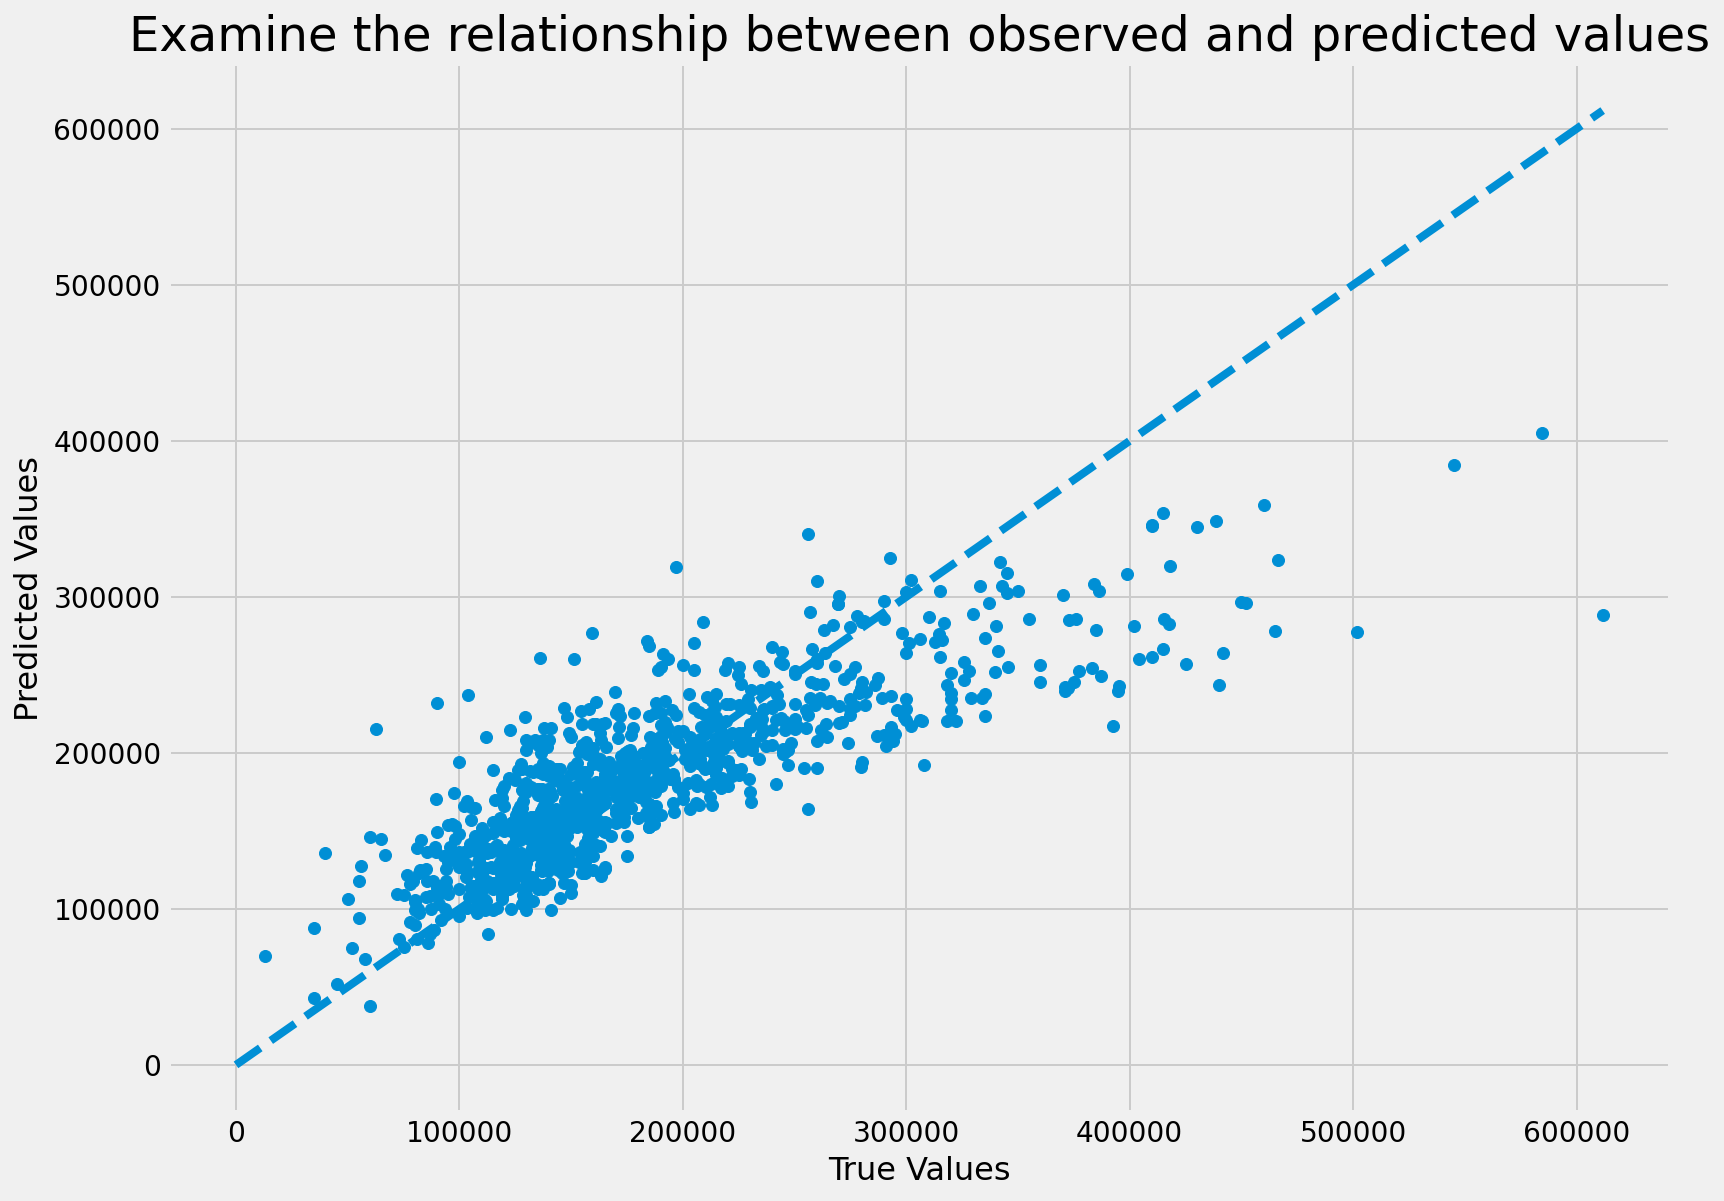

In [73]:
plt.figure(figsize = (12, 9))

plt.scatter(y_test, preds)

plt.plot([0, max(max(y_test),max(preds))],
         [0, max(max(y_test),max(preds))],
         linestyle = '--')

plt.title('Examine the relationship between observed and predicted values', fontsize = 24)
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);

## 7. Model Development Part 2 - Feature selection by top 10 features with highest coefficients

In [49]:
lasso_cv.coef_
lasso_coef2 = lasso_cv.coef_.tolist()
results2 = pd.DataFrame(columns = [i for i in X.columns])
results2 = results2.append(pd.Series(lasso_cv.coef_, index = results2.columns), ignore_index=True)
results2.head()

MS SubClass  Lot Frontage  Overall Qual  Overall Cond  Year Built  \
0  -144.731659     -11.46496   9718.753773   5181.065325  260.624925   

   Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Total Bsmt SF  \
0      132.789814     22.862242      0.031297      5.708208       5.312077   

   ...  Sale Type_New  Sale Type_Oth  Sale Type_VWD  Sale Type_WD   \
0  ...    9091.846317            0.0            0.0    -716.298118   

   Alley_Grvl   Alley_Pave  Pool QC_Ex  Pool QC_Fa    Pool QC_Gd  Pool QC_TA  
0         0.0 -8236.883588         0.0         0.0 -71133.843662        -0.0  

[1 rows x 220 columns]

In [50]:
results2.T.sort_values(by=[0], ascending=False).head(20)

0
Misc Feature_Gar2     104886.380632
Neighborhood_GrnHill   81120.509020
Neighborhood_StoneBr   61688.135731
Neighborhood_NridgHt   41487.489934
House Style_2.5Fin     28016.804926
Neighborhood_NoRidge   24469.618159
Condition 1_PosN       23908.216524
Neighborhood_Somerst   17523.171539
Garage Qual_Gd         16955.251990
Neighborhood_Veenker   15386.385122
Lot Shape_IR2          13543.827391
Land Contour_HLS       12127.143985
Neighborhood_Crawfor   10317.789311
Misc Feature_Shed      10211.343254
Bsmt Full Bath          9787.767191
Overall Qual            9718.753773
Fireplaces              9522.077957
Sale Type_New           9091.846317
Garage Cars             8707.079622
Bsmt Exposure_Gd        8536.458797

<Figure size 3600x2160 with 0 Axes>

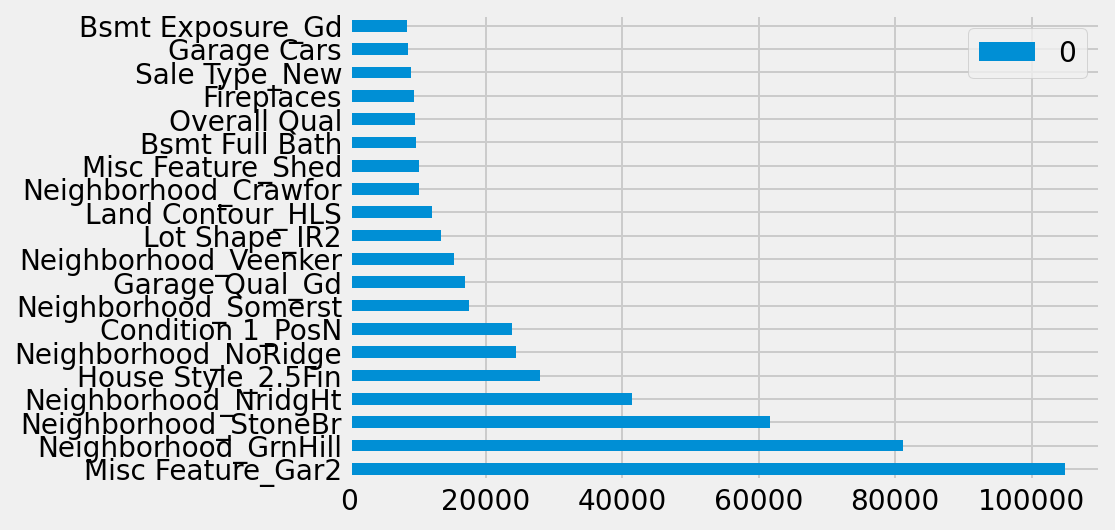

In [51]:
f = plt.figure(figsize=(50,30))
results2.T.sort_values(by=[0], ascending=False).head(20).plot(kind="barh");

In [52]:
# Creating a dataframe from the top 10 features based on coefficients to run further analysis
top10_hand_picked_features = new_train_data[['SalePrice','Gr Liv Area','Overall Qual','Fireplaces','Neighborhood_StoneBr','Overall Cond',
                                   'Screen Porch','Neighborhood_NridgHt','Garage Cars','Full Bath','Bsmt Full Bath']]

In [53]:
# Instantiate linear regression and separate the predictor and target variables
lr2 = LinearRegression()
X2 = top10_hand_picked_features.drop(['SalePrice'],axis=1)
y2 = new_train_data['SalePrice'] #only include target field

In [54]:
# Split the training dataset to training and validation dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5, random_state=42)

In [55]:
# Checking if the data has been split
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(1025, 10) (1025,)
(1026, 10) (1026,)


In [56]:
# Fitting the training dataset and evaluate the R-squared of the model for on both training and validation data
lr2.fit(X2_train,y2_train)
print(f'R-squared of training dataset: {cross_val_score(lr2, X2_train, y2_train, cv=10).mean()}')
print(f'R-squared of test dataset: {lr2.score(X2_test, y2_test)}')

R-squared of training dataset: 0.7934890748607328
R-squared of test dataset: 0.7980365491946437


In [57]:
# Checking the RMSE value of both training and validation dataset
print(f'RMSE of linear regression on training dataset: {mean_squared_error(y2_train, lr2.predict(X2_train), squared=False)}')
print(f'RMSE of linear regression on test dataset: {mean_squared_error(y2_test, lr2.predict(X2_test), squared=False)}')

RMSE of linear regression on training dataset: 35221.61397490635
RMSE of linear regression on test dataset: 35219.17150210299


In [58]:
lasso_cv2 = LassoCV(alphas = np.logspace(-5,3,100), cv = 5, max_iter=50000)
lasso_cv2.fit(X2_train, y2_train)

LassoCV(alphas=array([1.00000000e-05, 1.20450354e-05, 1.45082878e-05, 1.74752840e-05,
       2.10490414e-05, 2.53536449e-05, 3.05385551e-05, 3.67837977e-05,
       4.43062146e-05, 5.33669923e-05, 6.42807312e-05, 7.74263683e-05,
       9.32603347e-05, 1.12332403e-04, 1.35304777e-04, 1.62975083e-04,
       1.96304065e-04, 2.36448941e-04, 2.84803587e-04, 3.43046929e-04,
       4.13201240e-04, 4.97702356e-0...
       1.38488637e+01, 1.66810054e+01, 2.00923300e+01, 2.42012826e+01,
       2.91505306e+01, 3.51119173e+01, 4.22924287e+01, 5.09413801e+01,
       6.13590727e+01, 7.39072203e+01, 8.90215085e+01, 1.07226722e+02,
       1.29154967e+02, 1.55567614e+02, 1.87381742e+02, 2.25701972e+02,
       2.71858824e+02, 3.27454916e+02, 3.94420606e+02, 4.75081016e+02,
       5.72236766e+02, 6.89261210e+02, 8.30217568e+02, 1.00000000e+03]),
        cv=5, max_iter=50000)

In [59]:
y2_pred_lasso2 = lasso_cv2.predict(X2_test)
print(f'Lasso Regression MSE: {mean_squared_error(y2_test, y2_pred_lasso2, squared=False)}')

Lasso Regression MSE: 35219.17147721664


In [60]:
# Evaluate MSE for Lasso2

y2_train_lasso = lasso_cv2.predict(X2_train)
MSE_train = mean_squared_error(y2_train, y2_train_lasso)
y2_test_lasso = lasso_cv2.predict(X2_test)
MSE_test = mean_squared_error(y2_test, y2_test_lasso)
MSE_diff_lasso = abs(1-(MSE_train/MSE_test))

print(f'Lasso is not overfitted: {MSE_diff_lasso*100, "%"}')

Lasso is not overfitted: (0.01387075437915275, '%')


In [61]:
model = LassoCV()

model.fit(X2_train, y2_train)

preds = model.predict(X2_test)

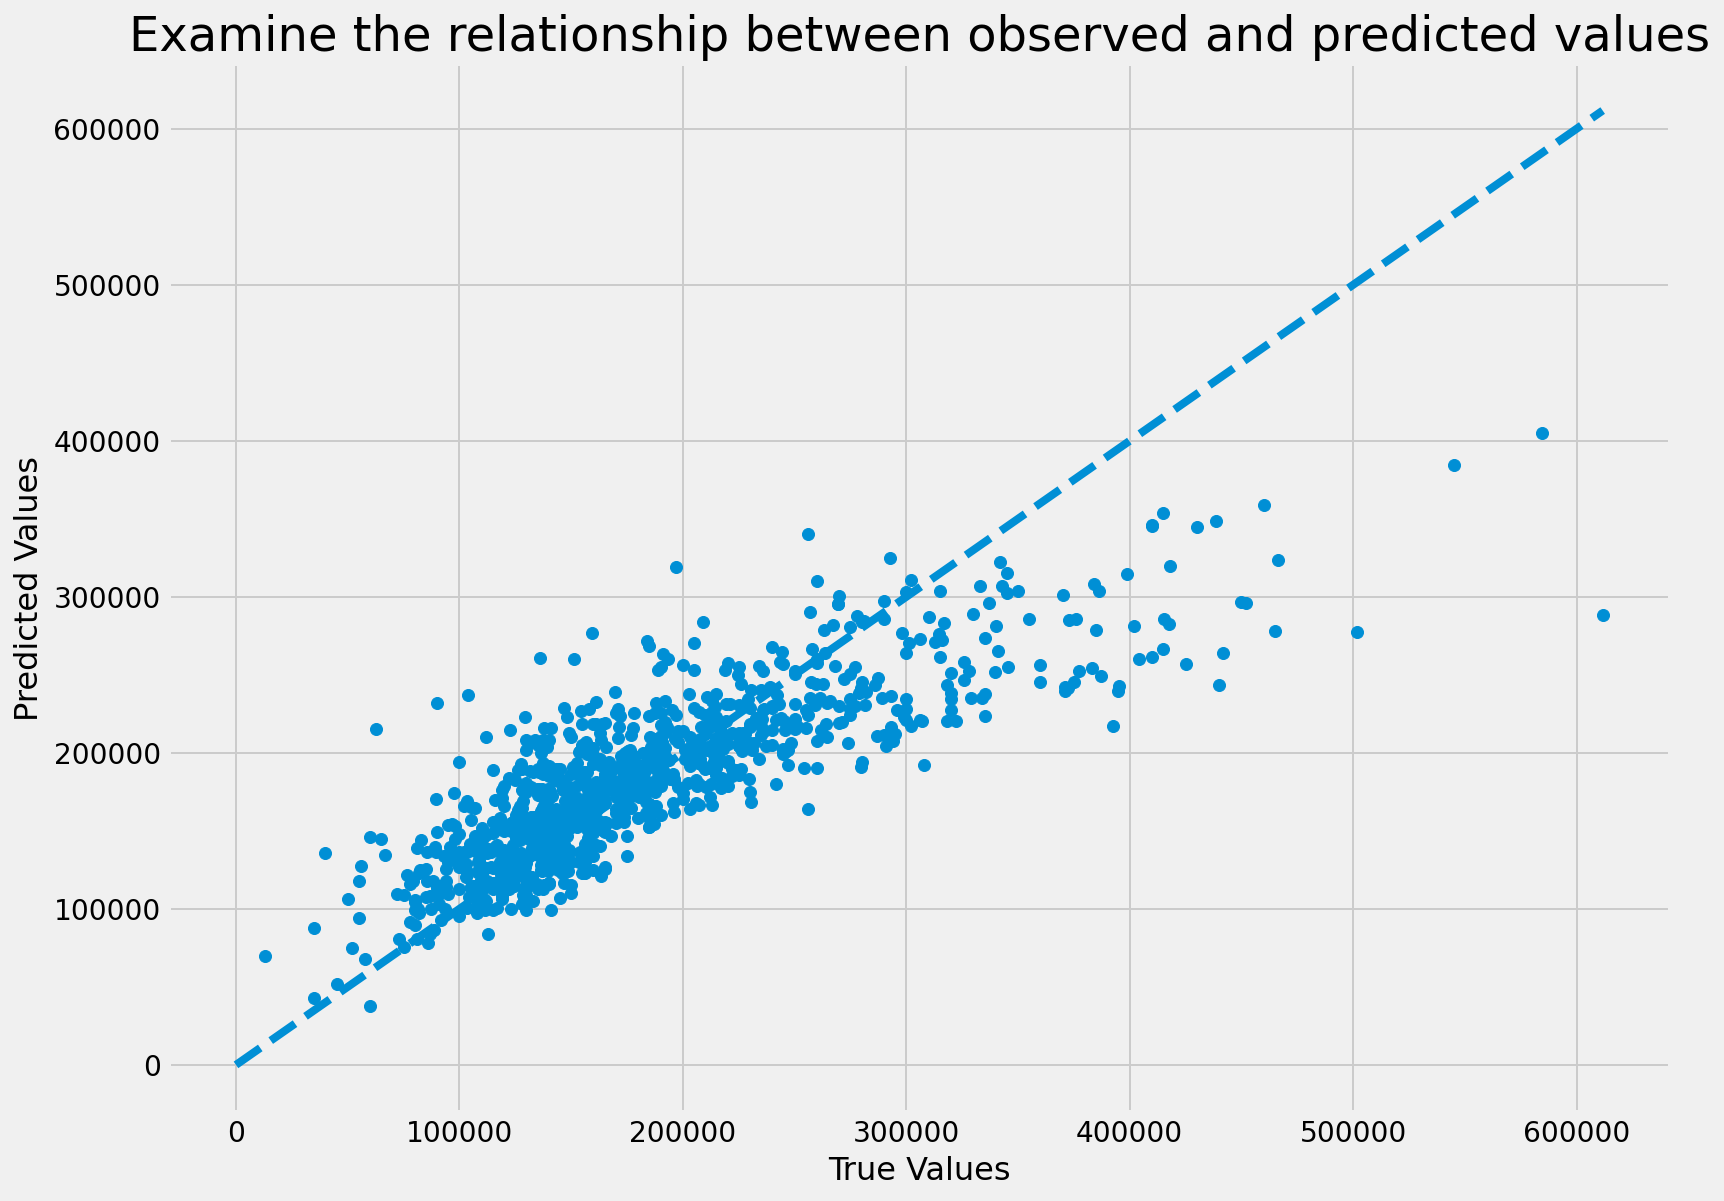

In [62]:
plt.figure(figsize = (12, 9))

plt.scatter(y2_test, preds)

plt.plot([0, max(max(y2_test),max(preds))],
         [0, max(max(y2_test),max(preds))],
         linestyle = '--')

plt.title('Examine the relationship between observed and predicted values', fontsize = 24)
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);

In [63]:
ols = sm.OLS(y2_train, X2_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2843.
Date:                Fri, 27 Aug 2021   Prob (F-statistic):                        0.00
Time:                        10:13:14   Log-Likelihood:                         -12226.
No. Observations:                1025   AIC:                                  2.447e+04
Df Residuals:                    1015   BIC:                                  2.452e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gr Liv Area             31.8045      3.274      9.713      0.000      25.379      38.230
Overall Qual          1.691e+04   1116.715     15.145      0.000    1.47e+04    1.91e+04
Fireplaces            1.584e+04   2136.624      7.414      0.000    1.16e+04       2e+04
Neighborhood_StoneBr  9.708e+04   9097.716     10.670      0.000    7.92e+04    1.15e+05
Overall Cond         -4564.0523    729.912     -6.253      0.000   -5996.362   -3131.743
Screen Porch            83.7782     21.581      3.882      0.000      41.429     126.128
Neighborhood_NridgHt  7.131e+04   5502.699     12.958      0.000    6.05e+04    8.21e+04
Garage Cars           1.599e+04   1950.239      8.197      0.000    1.22e+04    1.98e+04
Full Bath             3060.6929   2770.361      1.105      0.270   -2375.598    8496.984
Bsmt Full Bath         1.71e+04   2225.304      7.685      0.000    1.27e+04    2.15e+04
==============================================================================
Omnibus:                      168.656   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2804.004
Skew:                           0.052   Prob(JB):                         0.00
Kurtosis:                      11.102   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 8. Conclusion & Recommendations

After extensive research we have concluded that the model with the top 10 lasso coefficients is our best model with an MSE that is not overfitted. 

For our homeowners who wish to increase their sale price, they should focus on the following:

1. Including full bathrooms in the basement and above ground
2. A garage that fits at least 3 cars seems to be the popular choice
3. Remodel your home to include a screen porch
4. Include a fireplace, but that is optional
5. Having the first floor elevated above ground
6. Make sure that the walls, floors, ceilings, bathrooms, kitchen, stairs, doors, are not wornout because a high overall quality score will definitely increase your chances for a higher sale price.
7. Neighborhoods such as Northridge Heights and Stone Brook tend to fetch a higher sale price if you consider buying a new home in the near future.